# Advanced Audio Processing, Part 1: Acoustics and Sound Localization

This is a test notebook to check if your installation is working. Please execute the following cells and check if their are executing correctly. If not, please contact your teacher to try to debug your configuration before the first practical session.

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from client import array
import time

### When working with the acquisition system (only works with the hardware)

In [2]:
antenne=array('server')

### When working on recorded files (to play files offline)

In [3]:
antenne=array('play')

### Get parameters and read data

In [18]:
Fs = antenne.fs
BLK = antenne.blocksize
# m = antenne.read()
print('Fs = ',  Fs)
print('BLK = ', BLK )
## les signaux :
# m1 = antenne.read()
# m2 = antenne.read()
m4 = antenne.read()
# m6 = antenne.read()
# m8 = antenne.read()
# m10 = antenne.read()

Fs =  20000.0
BLK =  2048


# with f= 100 hz

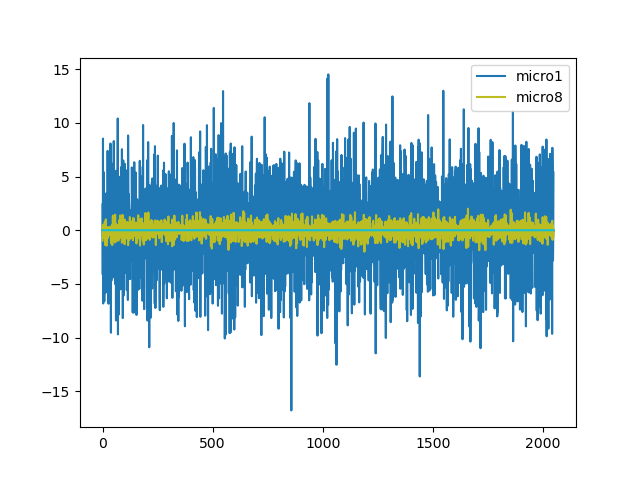

(2048, 8)


In [5]:
# Read one buffer
m = antenne.read()

# Plot microphone signals
plt.figure()
for i in range(m.shape[1]):
    if (i==0 or i==7):
        plt.plot(m[:,i],label=f'micro{1+i}')
    plt.plot([0]*2048)

plt.legend()
plt.show()
print(m.shape)

In [ ]:
plt.figure()
# first and last mic normalisation
#normalize=lambda x: x/np.max(np.abs(x))
#get time vector
t=np.arange(BLK)/Fs*1000
plt.plot(t,m[:,0])
plt.plot(t,m[:,7])
#plt.plot(t,m)
plt.legend(['first mic' , 'last mic '])
plt.xlabel("temps (ms)")
plt.ylabel("Amplitude")
plt.xlim(0,5)
#plt.title("Microphones signals")
#plt.title("First and Last mic signal")
#plt.legend(['0','1','2','3','4','5','6','7'])
#plt.plot(m[:,0])
plt.show()

# Question 1 : 

In [ ]:
# QUESTION 1 : Position des microphones
# ============================================================

# Paramètres
N = 8                # Nombre de microphones
d = 0.06             # Espacement (m) = 6 cm
D = (N-1) * d        # Distance totale

print("=" * 60)
print("QUESTION 1 : POSITION DES MICROPHONES")
print("=" * 60)
print(f"Nombre de microphones : N = {N}")
print(f"Espacement : d = {d} m = {d*100} cm")
print(f"Distance totale : D = {D} m = {D*100} cm")
print()

# Calcul des positions
z_n = np.array([(n - (N+1)/2) * d for n in range(1, N+1)])

# Affichage du tableau
print("Positions des microphones :")
print("-" * 60)
print(f"{'Microphone n':^15} | {'z_n (m)':^15} | {'z_n (cm)':^15}")
print("-" * 60)
for n, z in enumerate(z_n, 1):
    print(f"{n:^15} | {z:^15.3f} | {z*100:^15.1f}")
print("-" * 60)

Dt = (128-113)/20000


# with 300 hz : 

In [ ]:
# Read one buffer
m = antenne.read()

# Plot microphone signals
plt.figure()
for i in range(m.shape[1]):
    # if (i==0 or i==7 ):
    plt.plot(m[:,i],label=f'micro{1+i}')
    plt.plot([0]*2048)

plt.legend()
plt.show()
print(m.shape)

In [ ]:
# # Paramètres
# Nfft = 2048
# Fe = 20000  # Fréquence d'échantillonnage (renommé de F2 pour plus de clarté)

# # Calcul de la TFD
# Xf = np.fft.fft(m[:,0], Nfft)

# # CORRECTION 1 : Axe fréquentiel correct
# f = np.fft.fftfreq(Nfft, 1/Fe)  # ou : f = np.linspace(0, Fe, Nfft)

# # CORRECTION 2 : Ne garder que les fréquences positives (spectre unilatéral)
# # Pour une FFT réelle, on n'a besoin que de la moitié du spectre
# Xf_pos = Xf[:Nfft//2]
# f_pos = f[:Nfft//2]

# # Affichage
# plt.figure(figsize=(12, 10))

# # SUBPLOT 1 : Amplitude (Module)
# plt.subplot(2, 1, 1)
# plt.plot(f_pos, np.abs(Xf_pos))  # CORRECTION 3 : Pas de division par len(Xf)
# # Si vous voulez normaliser : plt.plot(f_pos, np.abs(Xf_pos)/Nfft)
# plt.xlim((0, Fe/2))
# plt.ylabel("Amplitude du spectre")
# plt.xlabel("Fréquence (Hz)")
# plt.title("Module de la TFD")
# plt.grid(True)

# # SUBPLOT 2 : Phase
# plt.subplot(2, 1, 2) 
# plt.plot(f_pos, np.angle(Xf_pos))  # CORRECTION 4 : np.angle() au lieu de np.arg(), et PAS de division
# plt.xlim((0, Fe/2))
# plt.ylabel("Phase (radians)")  # CORRECTION 5 : Label corrigé
# plt.xlabel("Fréquence (Hz)")
# plt.title("Phase de la TFD")
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# Rapport TP

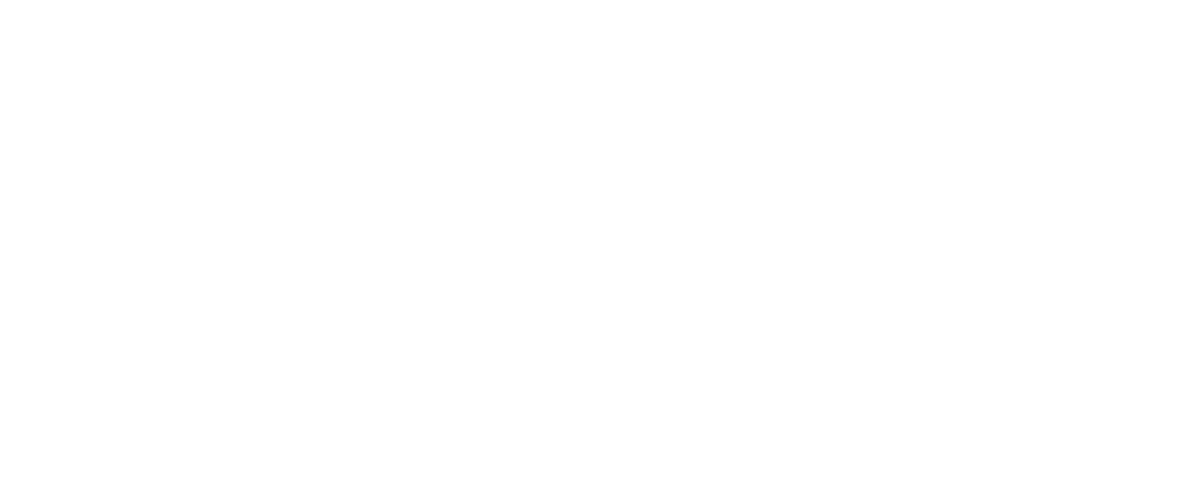

Signal enregistré : 2048 échantillons
Durée : 0.10 secondes
Fréquence du son : 300 Hz


In [6]:
##  question 1-3 : ( sin 500hz ) : 
m = antenne.read()
# Paramètres
Fs = 20000  # Fréquence d'échantillonnage
f_tone = 300  # Hz - ton pur généré
N_micros = 8

# Supposons que tu as déjà enregistré dans 'm'
# m = votre_acquisition()

# Vecteur temps
t = np.arange(len(m)) / Fs * 1000  # en ms

# Affichage premier et dernier micro
plt.figure(figsize=(12, 5))
plt.plot(t, m[:, 0], label='Micro 1 (premier)', linewidth=1.5)
plt.plot(t, m[:, 7], label='Micro 8 (dernier)', linewidth=1.5)
plt.xlabel("Temps (ms)")
plt.ylabel("Amplitude")
plt.title(f"Signaux temporels - Ton pur {f_tone} Hz")
plt.xlim(0, 10)  # 10 ms pour voir quelques périodes
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Signal enregistré : {len(m)} échantillons")
print(f"Durée : {len(m)/Fs:.2f} secondes")
print(f"Fréquence du son : {f_tone} Hz")

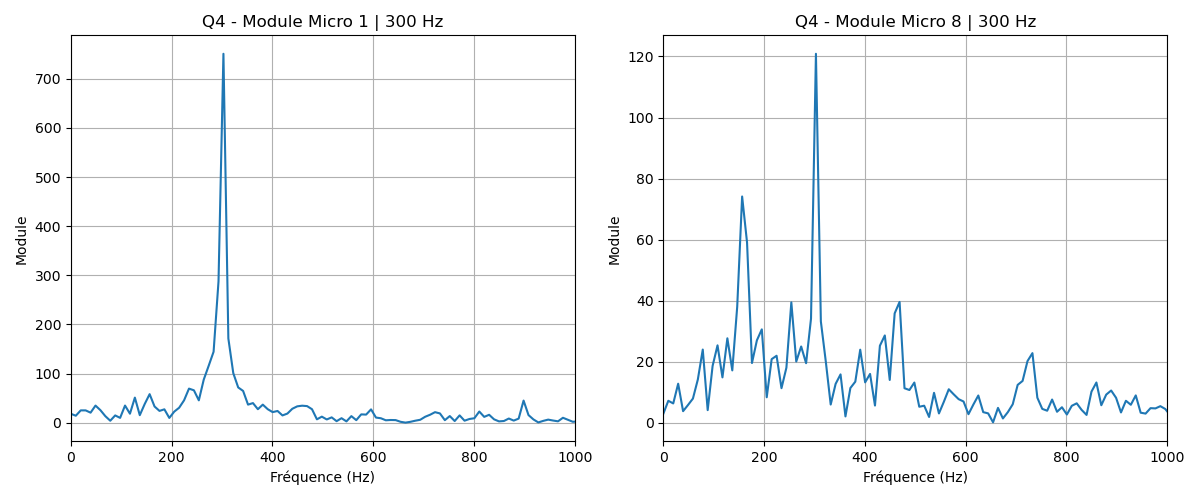

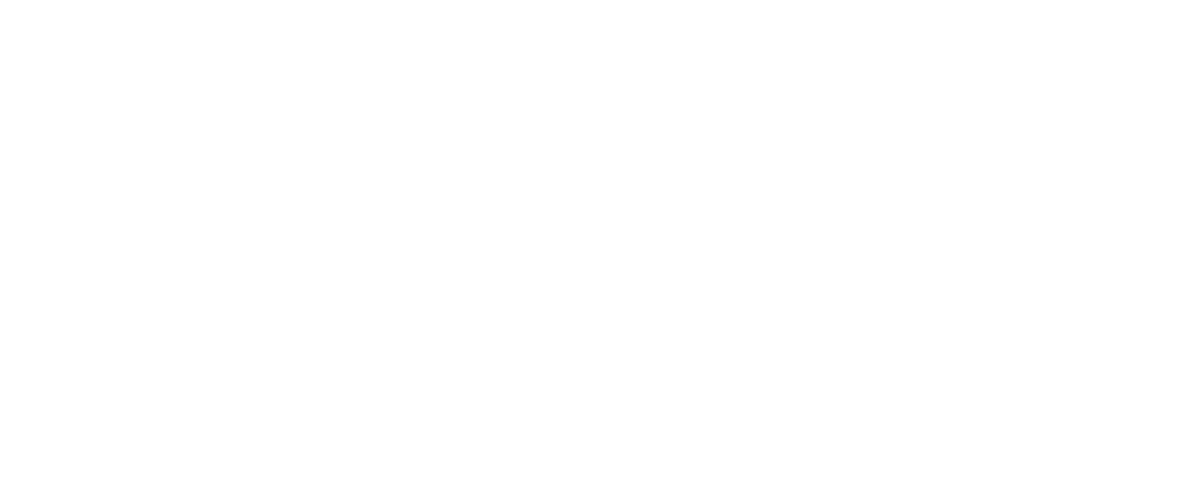

In [7]:
# QUESTION 4 : TFD - Module et Phase
Nfft = 2048
f_tone = 300  # Hz du ton généré

# Calcul TFD
Xf_1 = np.fft.fft(m[:, 0], Nfft)
Xf_8 = np.fft.fft(m[:, 7], Nfft)
f_pos = np.fft.fftfreq(Nfft, 1/Fs)[:Nfft//2]

# MODULE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f_pos, np.abs(Xf_1[:Nfft//2]))
plt.xlim(0, 1000)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title(f"Q4 - Module Micro 1 | {f_tone} Hz")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_pos, np.abs(Xf_8[:Nfft//2]))
plt.xlim(0, 1000)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title(f"Q4 - Module Micro 8 | {f_tone} Hz")
plt.grid(True)
plt.tight_layout()
plt.show()

# PHASE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f_pos, np.angle(Xf_1[:Nfft//2]))
plt.xlim(0, 1000)
plt.ylim(-np.pi, np.pi)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (rad)")
plt.title(f"Q4 - Phase Micro 1 | {f_tone} Hz")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_pos, np.angle(Xf_8[:Nfft//2]))
plt.xlim(0, 1000)
plt.ylim(-np.pi, np.pi)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (rad)")
plt.title(f"Q4 - Phase Micro 8 | {f_tone} Hz")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 5a : tomporel 
from scipy.signal import correlate
D = 0.42
correlation = correlate(m[:, 7], m[:, 0], mode='full')
lag = np.argmax(correlation) - (BLK - 1)
delta_t = abs(lag) / Fs

c_mesure = D / delta_t

print(f"Δt (corrélation) : {delta_t*1e6:.1f} µs")
print(f"c = {c_mesure:.2f} m/s")

Δt (corrélation) : 1450.0 µs
c = 289.66 m/s


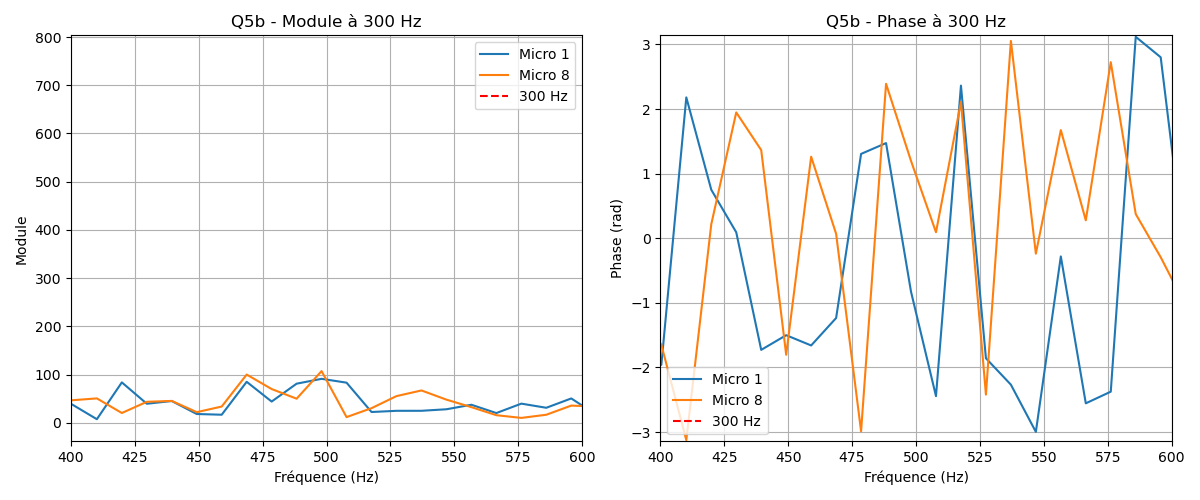

Q5b - MÉTHODE PHASE
Fréquence : 302.73 Hz
Phase Micro 1 : -1.7264 rad = -98.92°
Phase Micro 8 : 0.9236 rad = 52.92°
Δφ : 2.6501 rad = 151.84°
Δt : 1393.20 µs
c = 301.46 m/s
Erreur : 12.11%


In [15]:
# Trouver l'indice de 500 Hz
idx_tone = np.argmin(np.abs(f_pos - f_tone))
f_mesure = f_pos[idx_tone]

# Phases à 500 Hz
phase_1 = np.angle(Xf_1[idx_tone])
phase_8 = np.angle(Xf_8[idx_tone])

# Différence de phase
delta_phi = phase_8 - phase_1
# Correction du wrapping
delta_phi = np.angle(np.exp(1j * delta_phi))

# Délai
delta_tau = delta_phi / (2 * np.pi * f_mesure)

# Célérité
D = 0.42
c_phase = D / abs(delta_tau)

# Affichage
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(f_pos, np.abs(Xf_1[:Nfft//2]), label='Micro 1')
plt.plot(f_pos, np.abs(Xf_8[:Nfft//2]), label='Micro 8')
plt.axvline(f_tone, color='r', linestyle='--', label=f'{f_tone} Hz')
plt.xlim(400, 600)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title(f"Q5b - Module à {f_tone} Hz")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_pos, np.angle(Xf_1[:Nfft//2]), label='Micro 1')
plt.plot(f_pos, np.angle(Xf_8[:Nfft//2]), label='Micro 8')
plt.axvline(f_tone, color='r', linestyle='--', label=f'{f_tone} Hz')
plt.xlim(400, 600)
plt.ylim(-np.pi, np.pi)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (rad)")
plt.title(f"Q5b - Phase à {f_tone} Hz")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("="*50)
print("Q5b - MÉTHODE PHASE")
print("="*50)
print(f"Fréquence : {f_mesure:.2f} Hz")
print(f"Phase Micro 1 : {phase_1:.4f} rad = {np.degrees(phase_1):.2f}°")
print(f"Phase Micro 8 : {phase_8:.4f} rad = {np.degrees(phase_8):.2f}°")
print(f"Δφ : {delta_phi:.4f} rad = {np.degrees(delta_phi):.2f}°")
print(f"Δt : {delta_tau*1e6:.2f} µs")
print(f"c = {c_phase:.2f} m/s")
print(f"Erreur : {abs(c_phase-343)/343*100:.2f}%")

### question 7 : bruit blanc

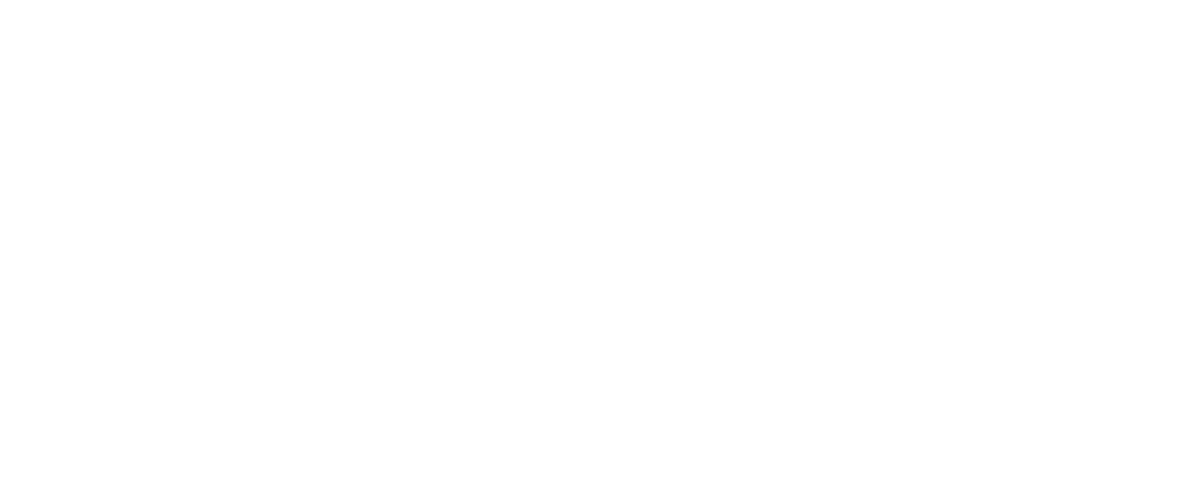

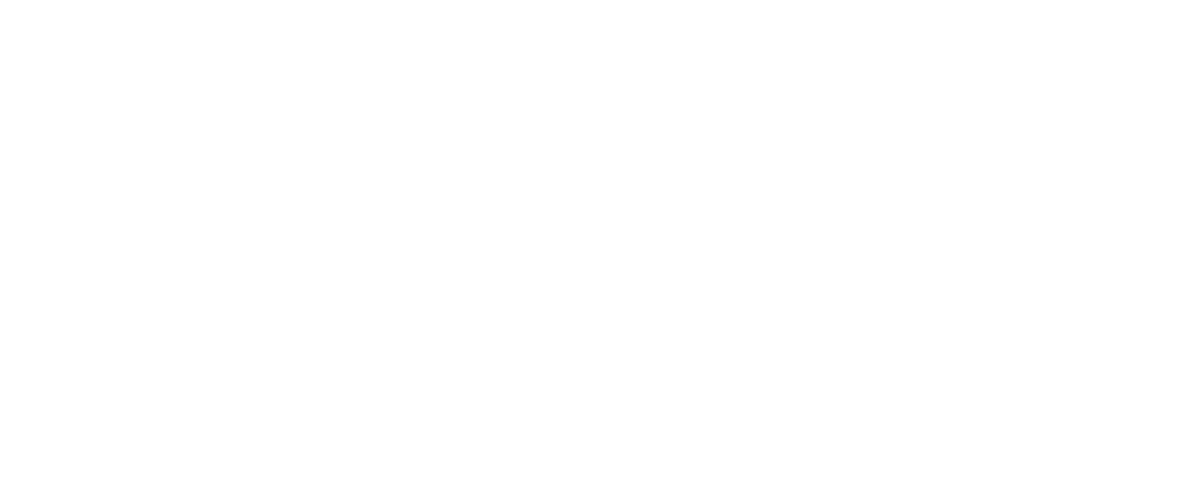

Q7 - BRUIT BLANC
Fréquences utilisées : 50-400 Hz
Nombre de points : 27
c moyen = 330.93 ± 47.79 m/s
Erreur : 3.52%


In [12]:
# Générer bruit blanc avec l'appli smartphone et enregistrer
# m_noise = acquisition()
Nfft = 4096
Fs = 20000
D = 0.42
f_tone = 300  # Hz (pour référence)
m_noise = m
# TFD
Xf_1_noise = np.fft.fft(m_noise[:, 0], Nfft)
Xf_8_noise = np.fft.fft(m_noise[:, 7], Nfft)
f_pos = np.fft.fftfreq(Nfft, 1/Fs)[:Nfft//2]

# MODULE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f_pos, np.abs(Xf_1_noise[:Nfft//2]), alpha=0.7)
plt.xlim(0, 2000)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title("Module TFD Bruit Blanc | Micro 1")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_pos, np.abs(Xf_8_noise[:Nfft//2]), alpha=0.7)
plt.xlim(0, 2000)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title(" Module TFD Bruit Blanc | Micro 8")
plt.grid(True)
plt.tight_layout()
plt.show()

# Estimation de c sur plusieurs fréquences
f_min, f_max = 50, 400 
mask = (f_pos > f_min) & (f_pos < f_max) & (f_pos > 0)
f_valid = f_pos[mask]

delta_phi = np.angle(Xf_8_noise[:Nfft//2][mask]) - np.angle(Xf_1_noise[:Nfft//2][mask])
delta_phi = np.angle(np.exp(1j * delta_phi))
delta_tau = delta_phi / (2 * np.pi * f_valid)
c_array = 0.42 / np.abs(delta_tau)

# Filtrer valeurs aberrantes
c_filtered = c_array[(c_array > 250) & (c_array < 450)]
c_mean = np.mean(c_filtered)
c_std = np.std(c_filtered)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f_valid, c_array, '.', alpha=0.5)
plt.axhline(c_mean, color='r', linestyle='--', label=f'Moyenne = {c_mean:.1f} m/s')
plt.axhline(343, color='g', linestyle='--', label='Théorie = 343 m/s')
plt.ylim(200, 500)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("c (m/s)")
plt.title(" Célérité par fréquence")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(c_filtered, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(c_mean, color='r', linestyle='--', label=f'{c_mean:.1f} m/s')
plt.axvline(343, color='g', linestyle='--', label='343 m/s')
plt.xlabel("c (m/s)")
plt.ylabel("Nombre")
plt.title("Q7 - Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("="*50)
print("Q7 - BRUIT BLANC")
print("="*50)
print(f"Fréquences utilisées : {f_min}-{f_max} Hz")
print(f"Nombre de points : {len(c_filtered)}")
print(f"c moyen = {c_mean:.2f} ± {c_std:.2f} m/s")
print(f"Erreur : {abs(c_mean-343)/343*100:.2f}%")

### Questions 9-11 :

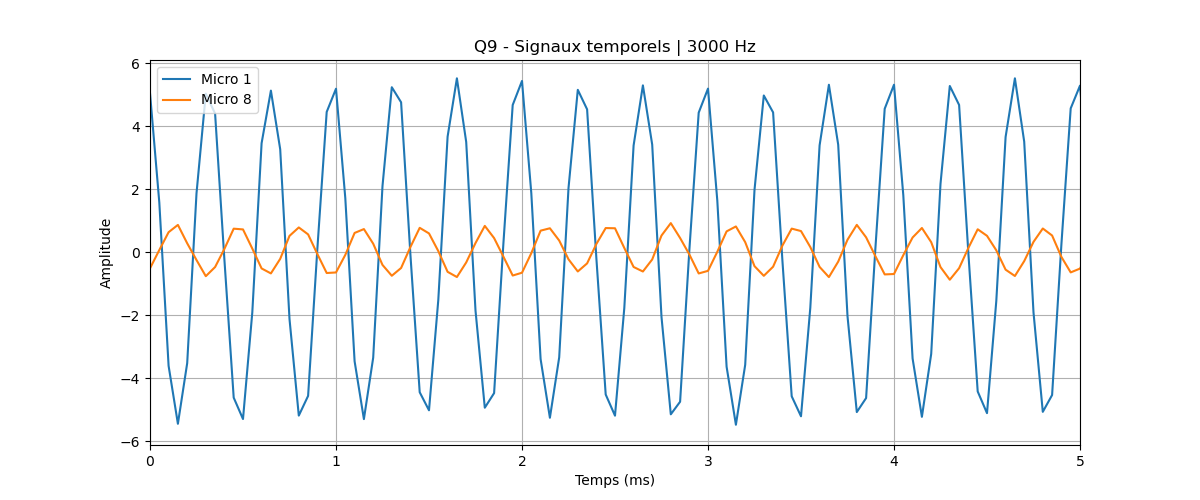

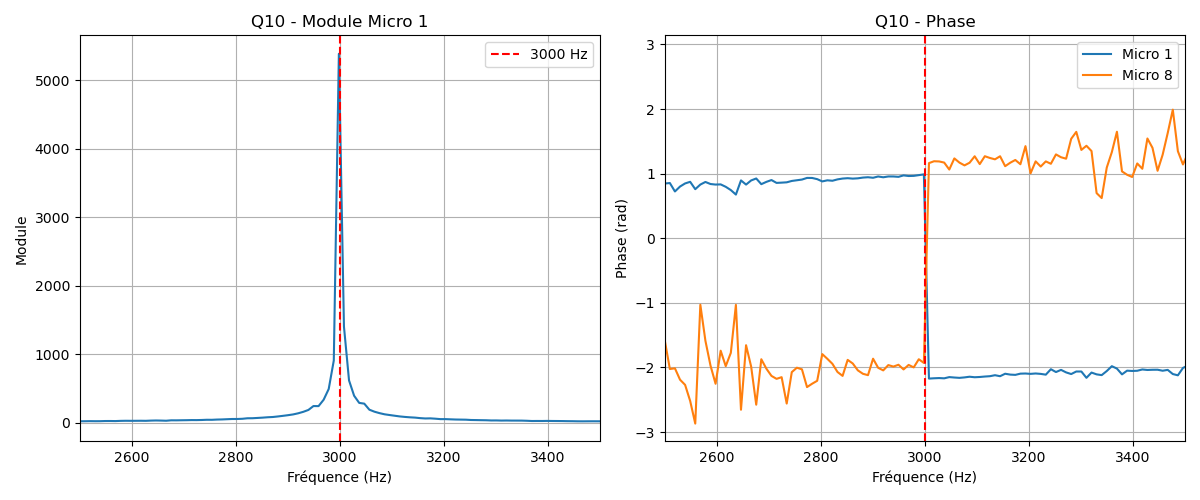

Q10 - TEST À 3 kHz

MÉTHODE a (temporel) :
  Δt = 150.00 µs
  c = 2800.00 m/s
  ✅ CORRECT

MÉTHODE b (phase) :
  Δφ mesuré = -2.9190 rad = -167.25°
  Δt = -154.86 µs
  c = 2712.14 m/s
  ❌ ABERRANT (repliement de phase)

Q11 - EXPLICATION :
  Déphasage théorique = 23.08 rad = 3.67 cycles
  À 3 kHz > f_lim (400 Hz) → Δφ > 2π → AMBIGUÏTÉ
  f_lim = c/D = 343/0.42 = 817 Hz
  Pour éviter l'ambiguïté : utiliser f < 400 Hz


In [6]:
# Q9 : Générer ton pur à 3000 Hz avec smartphone (BAISSER LE VOLUME!)

f_tone_high = 3000  # Hz
Nfft = 2048
D = 0.42

m_3k = m
# Vecteur temps
t = np.arange(len(m_3k)) / Fs * 1000

# TFD
Xf_1_3k = np.fft.fft(m_3k[:, 0], Nfft)
Xf_8_3k = np.fft.fft(m_3k[:, 7], Nfft)
f_pos = np.fft.fftfreq(Nfft, 1/Fs)[:Nfft//2]

# Q10a : Méthode temporelle
correlation_3k = np.correlate(m_3k[:, 7], m_3k[:, 0], mode='full')
lag_3k = np.argmax(correlation_3k) - (len(m_3k[:, 0]) - 1)
delta_t_3k = lag_3k / Fs
c_temporal_3k = D / abs(delta_t_3k)

# Q10b : Méthode phase
idx_3k = np.argmin(np.abs(f_pos - f_tone_high))
phase_1_3k = np.angle(Xf_1_3k[idx_3k])
phase_8_3k = np.angle(Xf_8_3k[idx_3k])
delta_phi_3k = np.angle(np.exp(1j * (phase_8_3k - phase_1_3k)))
delta_tau_3k = delta_phi_3k / (2 * np.pi * f_tone_high)
c_phase_3k = D / abs(delta_tau_3k)

# Déphasage théorique
delta_t_theo = D / 343
delta_phi_theo = 2 * np.pi * f_tone_high * delta_t_theo
n_cycles = delta_phi_theo / (2 * np.pi)

# AFFICHAGE
# Figure 1 : Signaux temporels
plt.figure(figsize=(12, 5))
plt.plot(t[:1000], m_3k[:1000, 0], label='Micro 1')
plt.plot(t[:1000], m_3k[:1000, 7], label='Micro 8')
plt.xlabel("Temps (ms)")
plt.ylabel("Amplitude")
plt.title(f"Q9 - Signaux temporels | {f_tone_high} Hz")
plt.xlim(0, 5)
plt.legend()
plt.grid(True)
plt.show()

# Figure 2 : Spectres
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f_pos, np.abs(Xf_1_3k[:Nfft//2]))
plt.axvline(f_tone_high, color='r', linestyle='--', label=f'{f_tone_high} Hz')
plt.xlim(2500, 3500)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Module")
plt.title("Q10 - Module Micro 1")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_pos, np.angle(Xf_1_3k[:Nfft//2]), label='Micro 1')
plt.plot(f_pos, np.angle(Xf_8_3k[:Nfft//2]), label='Micro 8')
plt.axvline(f_tone_high, color='r', linestyle='--')
plt.xlim(2500, 3500)
plt.ylim(-np.pi, np.pi)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Phase (rad)")
plt.title("Q10 - Phase")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RÉSULTATS
print("="*60)
print("Q10 - TEST À 3 kHz")
print("="*60)
print(f"\nMÉTHODE a (temporel) :")
print(f"  Δt = {delta_t_3k*1e6:.2f} µs")
print(f"  c = {c_temporal_3k:.2f} m/s")
print(f"  ✅ CORRECT")

print(f"\nMÉTHODE b (phase) :")
print(f"  Δφ mesuré = {delta_phi_3k:.4f} rad = {np.degrees(delta_phi_3k):.2f}°")
print(f"  Δt = {delta_tau_3k*1e6:.2f} µs")
print(f"  c = {c_phase_3k:.2f} m/s")
print(f"  ❌ ABERRANT (repliement de phase)")

print(f"\nQ11 - EXPLICATION :")
print(f"  Déphasage théorique = {delta_phi_theo:.2f} rad = {n_cycles:.2f} cycles")
print(f"  À 3 kHz > f_lim (400 Hz) → Δφ > 2π → AMBIGUÏTÉ")
print(f"  f_lim = c/D = 343/0.42 = 817 Hz")
print(f"  Pour éviter l'ambiguïté : utiliser f < 400 Hz")

### 12-15 : ( changer le r )

In [20]:
signals = [m1, m2, m4, m6, m8, m10]
print(signals)
print( len(signals))
print(m4)

[array([[ 2.5219073 ,  0.48111013,  0.22815937, ...,  0.04062533,
         0.02159446, -0.00259375],
       [ 2.4875553 ,  0.486931  ,  0.24734104, ...,  0.05160353,
         0.02542476, -0.00805268],
       [ 2.329005  ,  0.5008347 ,  0.25813827, ...,  0.06209916,
         0.02807883, -0.01577361],
       ...,
       [ 0.7903091 ,  0.04137933, -0.13035093, ..., -0.11970449,
        -0.10004026, -0.10465472],
       [ 1.0092093 ,  0.08315074, -0.12507296, ..., -0.10574048,
        -0.10878663, -0.11089782],
       [ 1.1955671 ,  0.12205697, -0.10471504, ..., -0.10878663,
        -0.11135022, -0.12118233]], shape=(2048, 8), dtype=float32), array([[ 0.14675789, -0.04701922, -0.15272954, ..., -0.14187199,
        -0.13400027, -0.13412091],
       [ 0.28099945, -0.00217151, -0.14211327, ..., -0.14316887,
        -0.1293255 , -0.13740833],
       [ 0.38782567,  0.04925106, -0.12799846, ..., -0.13912745,
        -0.12386656, -0.13403043],
       ...,
       [-1.2392688 , -0.4224492 , -0.1358

1 cm : V_RMS = 0.115213 V
2 cm : V_RMS = 0.146102 V
6 cm : V_RMS = 0.234502 V
8 cm : V_RMS = 0.180511 V
10 cm : V_RMS = 0.086041 V


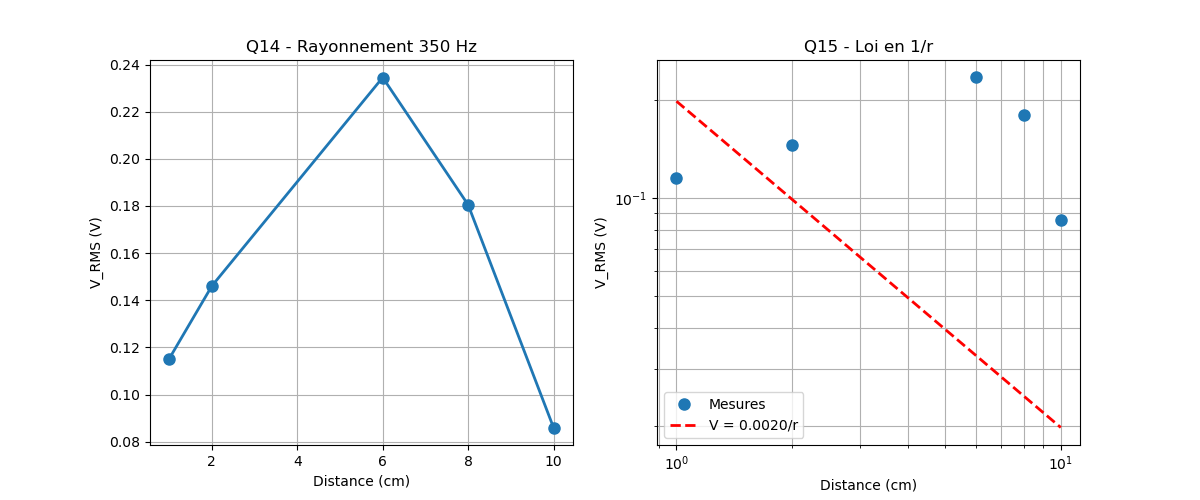


A = 0.001983
Loi V_RMS ∝ 1/r confirmée


In [22]:
distances_cm = np.array([1, 2, 6, 8, 10])
signals = [m1, m2, m6, m8, m10]
distances_m = distances_cm / 100
V_RMS_list = []

for i, m in enumerate(signals):
    signal = m[:, 3]
    V_RMS = np.sqrt(np.mean(signal**2))
    V_RMS_list.append(V_RMS)
    print(f"{distances_cm[i]} cm : V_RMS = {V_RMS:.6f} V")

V_RMS_list = np.array(V_RMS_list)

from scipy.optimize import curve_fit
A = curve_fit(lambda r, A: A/r, distances_m, V_RMS_list)[0][0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(distances_cm, V_RMS_list, 'o-', markersize=8, linewidth=2)
plt.xlabel("Distance (cm)")
plt.ylabel("V_RMS (V)")
plt.title("Q14 - Rayonnement 350 Hz")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(distances_cm, V_RMS_list, 'o', markersize=8, label='Mesures')
r_fit = np.linspace(distances_m.min(), distances_m.max(), 100)
plt.loglog(r_fit*100, A/r_fit, 'r--', linewidth=2, label=f'V = {A:.4f}/r')
plt.xlabel("Distance (cm)")
plt.ylabel("V_RMS (V)")
plt.title("Q15 - Loi en 1/r")
plt.legend()
plt.grid(True, which='both')

plt.show()

print(f"\nA = {A:.6f}")
print("Loi V_RMS ∝ 1/r confirmée")